<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/Chapter12_4_torchnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# 12.4.1 파이토치 신경망 모듈 (torch.nn)
torch.nn 모듈의 기능을 사용하지 않고 기본적인 파이토치 텐서 연산만 사용하여 간단한 데이터셋으로 선형 회귀 모델을 훈련해 보자.  
그 다음 torch.nn과 torch.optim의 기능을 점진적으로 추가하고, 이전 절에서 배운 Dataset 및 DataLoader과 같은 데이터셋 파이프라인 기능도 활용해보자.  

파이토치에서 신경망을 구축하는데 가장 일반적으로 사용되는 방법은 층을 쌓아 네트워크를 구성할 수 있는 nn.Module을 사용하는 것임.  
이는 정방향 계산을 제어하기 편리함.  


# 12.4.2 선형 회귀 모델 만들기
넘파이로 작은 데이터셋을 만들고 그래프로 그려보자

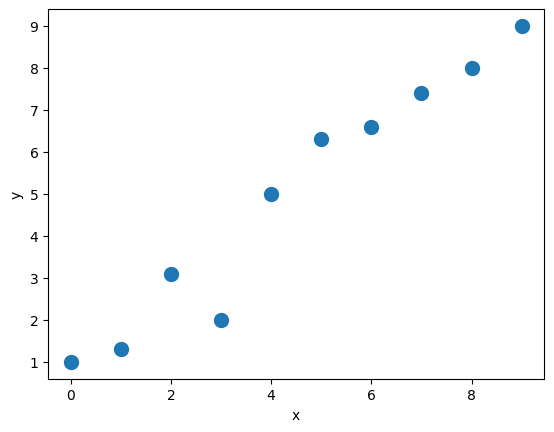

In [42]:
X_train = np.arange(10, dtype = 'float32').reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
                    6.3, 6.6, 7.4, 8.0,
                    9.0], dtype = 'float32')

plt.plot(X_train, y_train, 'o', markersize = 10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [43]:
# 그다음 특성을 표준화하고 훈련 세트를 위한 파이토치 Dataset과 이에 해당하는 DataLoader를 만들어 주자
from torch.utils.data import TensorDataset, DataLoader
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_d1 = DataLoader(train_ds, batch_size, shuffle = True, drop_last = False)

In [44]:
for i,record in enumerate(train_d1, 1):
  print(f"batch {i},   x:", record[0],
         "              y:", record[1])

batch 1,   x: tensor([[-0.1741]])               y: tensor([5.])
batch 2,   x: tensor([[-0.8704]])               y: tensor([3.1000])
batch 3,   x: tensor([[-1.5667]])               y: tensor([1.])
batch 4,   x: tensor([[0.5222]])               y: tensor([6.6000])
batch 5,   x: tensor([[1.2185]])               y: tensor([8.])
batch 6,   x: tensor([[0.8704]])               y: tensor([7.4000])
batch 7,   x: tensor([[1.5667]])               y: tensor([9.])
batch 8,   x: tensor([[-1.2185]])               y: tensor([1.3000])
batch 9,   x: tensor([[0.1741]])               y: tensor([6.3000])
batch 10,   x: tensor([[-0.5222]])               y: tensor([2.])


In [45]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad = True)

def model(xb):
  return xb @ weight + bias

In [46]:
def loss_fn(input, target): # 평균 제곱 오차(MSE)를 사용하자
  return (input - target).pow(2).mean()
  # return np.mean((target - input) ** 2)

In [47]:
# 에포크 200 번으로 돌려보자

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
  for x_batch,  y_batch in train_d1:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch.long())
    loss.backward()
  with torch.no_grad():
    weight -= weight.grad * learning_rate
    bias -= bias.grad * learning_rate
    weight.grad.zero_()
    bias.grad.zero_()
  if epoch & log_epochs == 0:
    print(f"epoch {epoch} loss {loss.item():.4f}")


epoch 0 loss 41.2725
epoch 1 loss 25.2623
epoch 4 loss 27.0412
epoch 5 loss 2.5000
epoch 16 loss 7.4821
epoch 17 loss 14.6081
epoch 20 loss 1.0575
epoch 21 loss 17.2813
epoch 32 loss 1.5804
epoch 33 loss 13.4033
epoch 36 loss 4.0137
epoch 37 loss 6.6175
epoch 48 loss 0.0004
epoch 49 loss 0.0001
epoch 52 loss 0.0081
epoch 53 loss 2.4841
epoch 64 loss 2.7771
epoch 65 loss 0.1542
epoch 68 loss 1.6991
epoch 69 loss 3.0089
epoch 80 loss 2.4036
epoch 81 loss 0.8831
epoch 84 loss 0.5094
epoch 85 loss 0.5292
epoch 96 loss 2.1728
epoch 97 loss 0.0415
epoch 100 loss 1.1155
epoch 101 loss 1.5496
epoch 112 loss 0.0840
epoch 113 loss 0.6597
epoch 116 loss 0.2462
epoch 117 loss 0.2338
epoch 128 loss 0.1275
epoch 129 loss 0.2203
epoch 132 loss 0.0428
epoch 133 loss 0.2940
epoch 144 loss 0.1084
epoch 145 loss 0.1032
epoch 148 loss 0.0891
epoch 149 loss 0.1748
epoch 160 loss 0.0483
epoch 161 loss 1.5754
epoch 164 loss 0.8479
epoch 165 loss 1.6038
epoch 176 loss 0.2176
epoch 177 loss 1.6775
epoch 180 lo

In [48]:
print('최종 파라미터:', weight.item(), bias.item())

최종 파라미터: 2.645277738571167 4.715577602386475


In [49]:
# 훈련된 모델을 확인하고 그래프로 그려 보자
# 0에서 9까지 일정한 간격을 가진 넘파이 배열을 테스트 데이터로 만들자
# 표준화된 특성으로 모델훈련을 진행했으므로, 테스트 데이터에도 동일한 표준화를 적용하는것을 잊지 말자
X_test = np.linspace(0, 9, num = 100, dtype = 'float32').reshape(-1,1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach()

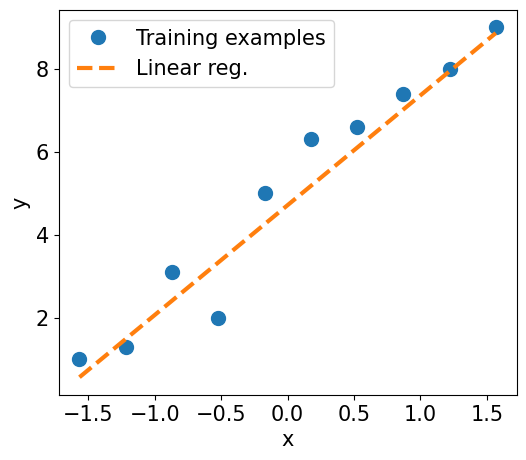

In [50]:
fig = plt.figure(figsize = (13,5))
ax = fig.add_subplot(1,2,1)
plt.plot(X_train_norm, y_train, 'o', markersize = 10)
plt.plot(X_test_norm, y_pred, '--' ,lw = 3)
plt.legend(['Training examples', 'Linear reg.'], fontsize = 15)
ax.set_xlabel('x', size = 15)
ax.set_ylabel('y', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.show()

# 12.4.3 torch.nn과 torch.optim 모듈로 모델 훈련하기
손실 함수 작성과 그레디언트 업데이트 같은 반복되는 작업들을 torch.nn과 torch.optim 모듈에서 제공하는 함수들을 써서 실행해보자.  

torch.nn 모듈은 여러 가지 손실 함수를 제공하며  
torch.optim 모듈은 계산된 그레디언트를 기반으로 파라미터를 업데이트하는 데 가장 너리 사용되는 최적화 알고리즘을 지원함.

In [51]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


In [52]:
# 이제 모델 훈련을 위해서는 optimizer 객체의 step() 메서드를 호출하면 됨
for epoch in range(num_epochs):
  for x_batch, y_batch in train_d1:
    # 1. 예측을 생성한다
    pred = model(x_batch)[:,0]
    # 2. 손실을 계산한다
    loss = loss_fn(pred, y_batch)
    # 3. 그레디언트를 계산한다
    loss.backward()
    # 4. 그레디언트를 사용하여 파라미터를 업데이트한다
    optimizer.step()
    # 5. 그레디언트를 0으로 초기화한다
    optimizer.zero_grad()

  if epoch & log_epochs == 0:
    print(f'에포크 {epoch} 손실 {loss.item():.4f}')

에포크 0 손실 24.6684
에포크 1 손실 23.7967
에포크 4 손실 40.1114
에포크 5 손실 2.2602
에포크 16 손실 14.0045
에포크 17 손실 4.5389
에포크 20 손실 20.9207
에포크 21 손실 20.8593
에포크 32 손실 8.1426
에포크 33 손실 18.2845
에포크 36 손실 7.1417
에포크 37 손실 2.5226
에포크 48 손실 4.8775
에포크 49 손실 7.2838
에포크 52 손실 6.5229
에포크 53 손실 4.1851
에포크 64 손실 6.4273
에포크 65 손실 0.0983
에포크 68 손실 2.7062
에포크 69 손실 4.0370
에포크 80 손실 0.0157
에포크 81 손실 1.9131
에포크 84 손실 0.8414
에포크 85 손실 1.7777
에포크 96 손실 1.5238
에포크 97 손실 1.1554
에포크 100 손실 0.8412
에포크 101 손실 0.0861
에포크 112 손실 0.7951
에포크 113 손실 0.5303
에포크 116 손실 1.5094
에포크 117 손실 0.8661
에포크 128 손실 0.4434
에포크 129 손실 1.6350
에포크 132 손실 0.4725
에포크 133 손실 0.0805
에포크 144 손실 0.3808
에포크 145 손실 0.0449
에포크 148 손실 0.3118
에포크 149 손실 0.0965
에포크 160 손실 0.1043
에포크 161 손실 0.2306
에포크 164 손실 2.0544
에포크 165 손실 0.2115
에포크 176 손실 0.3089
에포크 177 손실 0.1140
에포크 180 손실 0.0009
에포크 181 손실 0.1159
에포크 192 손실 2.2135
에포크 193 손실 0.2877
에포크 196 손실 0.3486
에포크 197 손실 2.2339


In [53]:
print("최종 파라미터 : ", model.weight.item(), model.bias.item())

최종 파라미터 :  2.6496422290802 4.87706995010376


# 12.4.4 붓꽃 데이터셋을 분류하는 다층 퍼셉트론 만들기
이전 예제에서 scratch 로 모델을 만들고, SGD로 훈련했었음.  
파이토치는 신경망 모델의 구성 요소로 사용할 수 있는 사전 정의된 층을 `torch.nn` 모듈을 통해 제공함  
이 절에서는 이런 층을 사용하여 붓꽃 데이터셋에서 (세 개의 붓꽃 품종을 식별하는) 분류 문제를 해결하고 torch.nn 모듈을 사용하여 두 개의 층으로 구성된 퍼셉트론을 구축하는 방법을 알아보자.  



In [94]:
# 먼저 sklearn.datasets에서 데이터를 다운로드한다
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)
# print(iris.DESCR)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [102]:
from sklearn.model_selection import train_test_split
X = iris['data']
y = iris['target']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 1./3, random_state = 1, shuffle = True, stratify = y)

In [103]:
# 특성 표준화하고 훈련 세트를 위한 Dataset과 DataLoader를 만들자
print(np.mean(X_train))
print(np.mean(X_train,axis = 0))
print(np.mean(X_train,axis = 1)[:10])
print(np.mean(X_train,axis = 1).reshape(-1,1)[:10])
# X_ = np.zeros((10,4))
# print(X_ - np.mean(X_train,axis = 1).reshape(-1,1)[:10])

# Q : 아래 두 표준화의 차이점은 무엇이고, 어떤것이 더 좋은 표준화일까?
# X_train_norm = (X_train - np.mean(X_train, axis = 1).reshape(-1,1)) / np.std(X_train, axis = 1).reshape(-1,1)
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_d1 = DataLoader(dataset = train_ds, batch_size = batch_size, shuffle = True)

3.4652499999999997
[5.839 3.081 3.748 1.193]
[2.6   3.2   4.825 4.8   2.35  2.375 3.9   2.65  4.55  4.   ]
[[2.6  ]
 [3.2  ]
 [4.825]
 [4.8  ]
 [2.35 ]
 [2.375]
 [3.9  ]
 [2.65 ]
 [4.55 ]
 [4.   ]]


In [104]:
# 이제 torch.nn 모듈을 사용해서 모듈을 구축해 보자
# nn.Module 클래스를 사용해서 몇 개의 층을 쌓아 신경망을 만들 수 있음.
# 사용할 수 있는 전체 층 목록 : https://pytorch.org/docs/stable/nn.html
# fully connected layer를 쌓아보자

# 입력레이블은 X.shape[0]개, X.shape[1]개의 특성, 은닉층이 16개의 뉴런, 클래스 레이블은 3개
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)

  def forward(self,x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    return x

In [105]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [106]:
# 손실 함수는 cross entropy, optimizer는 adam으로 해보자
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [107]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_d1:
    pred = model.forward(x_batch)
    loss = loss_fn(pred,y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist[epoch] += loss.item() * y_batch.size(0)
    is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
    accuracy_hist[epoch] += is_correct.sum()
  loss_hist[epoch] /= len(train_d1.dataset)
  accuracy_hist[epoch] /= len(train_d1.dataset)


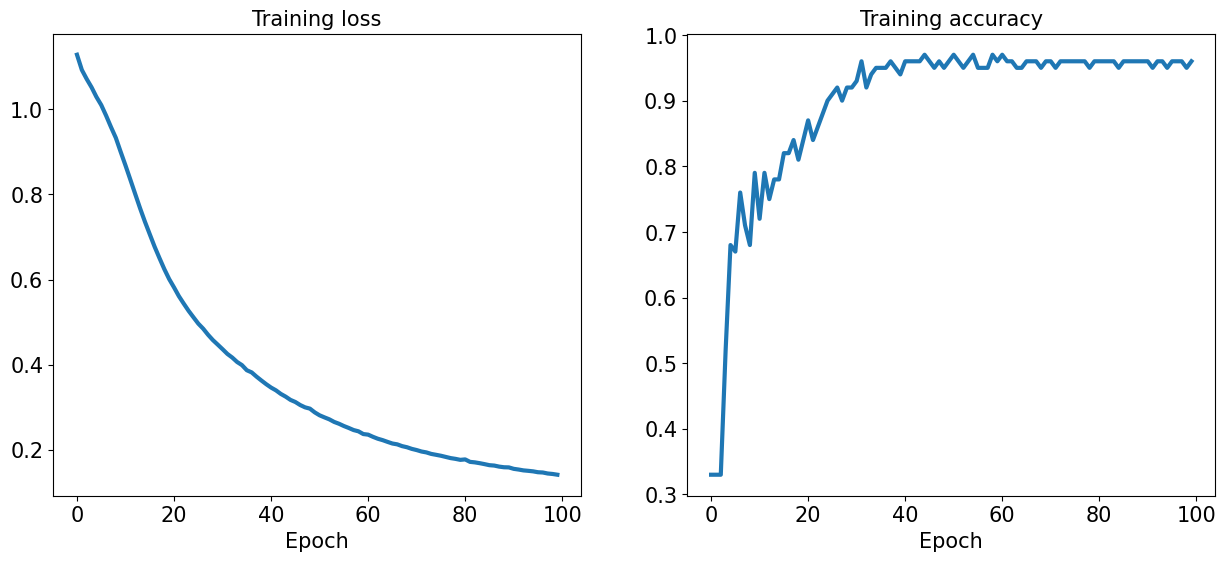

In [108]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist, lw=3)
ax.set_title("Training loss", size = 15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(accuracy_hist, lw = 3)
ax.set_title("Training accuracy", size = 15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.show()

In [109]:
# 두 표준화를 방식을 비교해보자
X_train_norm = (X_train - np.mean(X_train, axis = 1).reshape(-1,1)) / np.std(X_train, axis = 1).reshape(-1,1)
X_train_norm = torch.from_numpy(X_train_norm).float()
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_d1 = DataLoader(train_ds, batch_size, shuffle = True)
model_std2 = Model(input_size, hidden_size, output_size)

num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_std2.parameters(), lr = learning_rate)
for epoch in range(num_epochs):
  for x_batch, y_batch in train_d1:
    pred = model_std2.forward(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist[epoch] += loss.item() * y_batch.size(0)
    is_correct = (torch.argmax(pred, dim = 1) == y_batch).float()
    accuracy_hist[epoch] += is_correct.sum()
  loss_hist[epoch] /= len(train_d1.dataset)
  accuracy_hist[epoch] /= len(train_d1.dataset)


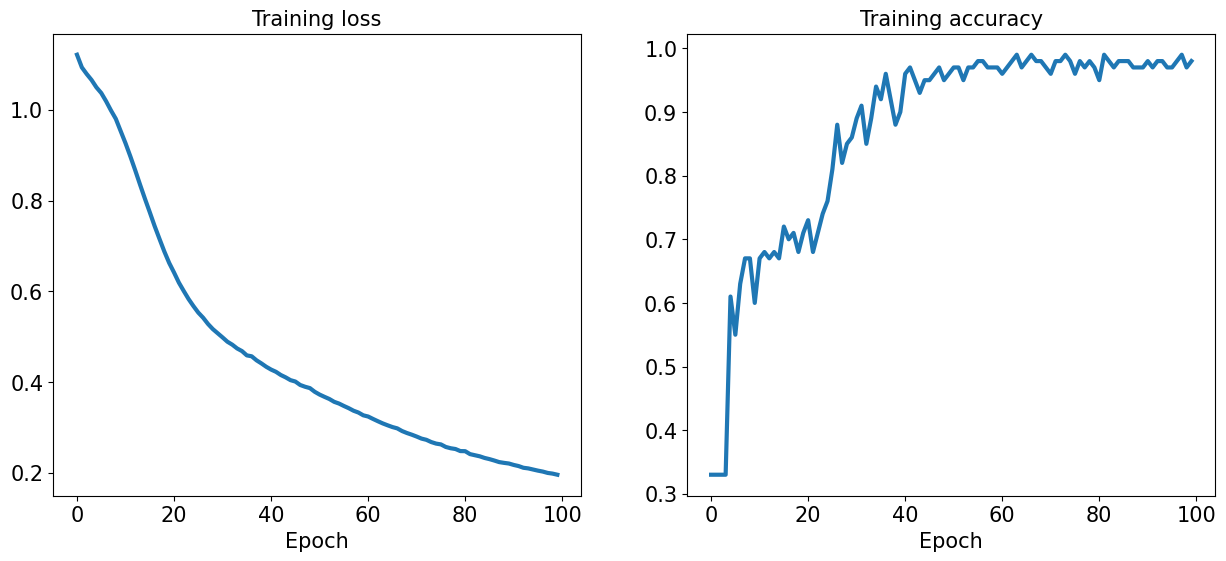

In [110]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist, lw=3)
ax.set_title("Training loss", size = 15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(accuracy_hist, lw = 3)
ax.set_title("Training accuracy", size = 15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.show()

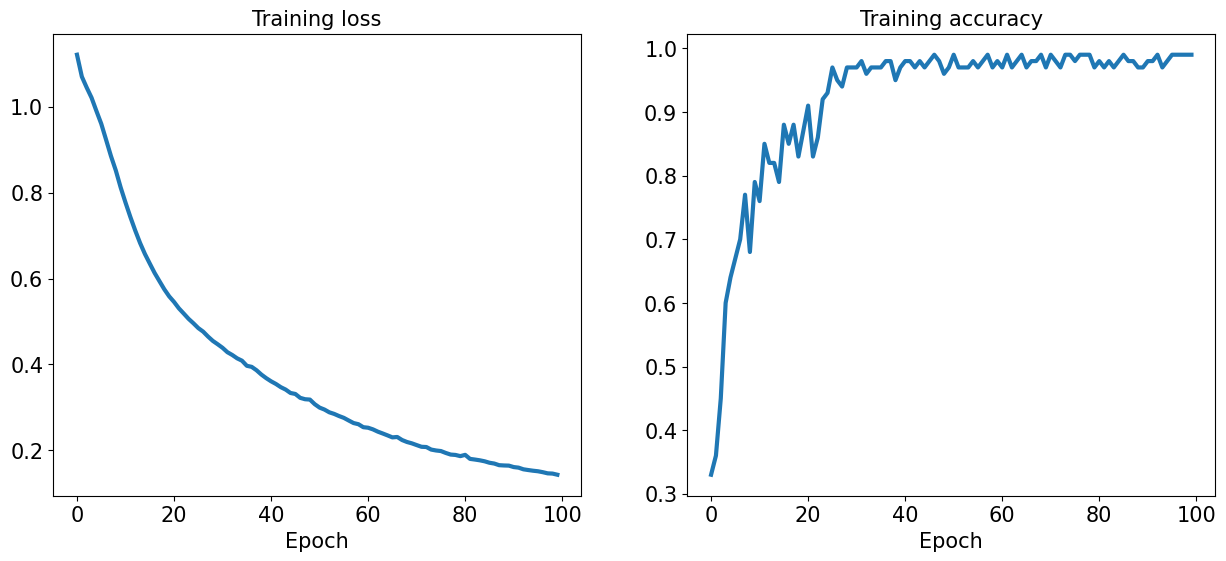

In [111]:
# 표준화 안한다면?
X_train_norm = X_train
X_train_norm = torch.from_numpy(X_train_norm).float()
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_d1 = DataLoader(train_ds, batch_size, shuffle = True)
model_non_std = Model(input_size, hidden_size, output_size)

num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_non_std.parameters(), lr = learning_rate)
for epoch in range(num_epochs):
  for x_batch, y_batch in train_d1:
    pred = model_non_std.forward(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist[epoch] += loss.item() * y_batch.size(0)
    is_correct = (torch.argmax(pred, dim = 1) == y_batch).float()
    accuracy_hist[epoch] += is_correct.sum()
  loss_hist[epoch] /= len(train_d1.dataset)
  accuracy_hist[epoch] /= len(train_d1.dataset)

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist, lw=3)
ax.set_title("Training loss", size = 15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(accuracy_hist, lw = 3)
ax.set_title("Training accuracy", size = 15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.show()

# 12.4.5 테스트 데이터셋에서 모델 평가하기
훈련된 모델의 분류 정확도를 테스트 데이터셋에서 평가해보자

In [112]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)

In [113]:
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim = 1) == y_test).float()
accuracy = correct.mean()
print(f'테스트 정확도: {accuracy:.4f}')

pred_test_non_std = model_non_std(X_test_norm)
accuracy_non_std = (torch.argmax(pred_test, dim = 1) == y_test).float().mean()
print(f'테스트 정확도: {accuracy_non_std:.4f}')

테스트 정확도: 0.9800
테스트 정확도: 0.9800


# 12.4.6 훈련된 모델 저장하고 로드하기
나중을 위해 훈련된 모델을 디스크에 저장해보자

In [116]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'Colab Notebooks/pyml/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/pyml


In [119]:
# save(model) 을 호출하면 모델 아키텍처와 학습된 모든 파라미터를 저장함
# 일반적으로 pt 또는 pth 확장자를 사용하여 모델을 저장함
path = 'Chapter12/iris_classifier.pt'
torch.save(model, path)

In [120]:
# 저장된 모델을 로드해보자
model_new = torch.load(path)
model_new.eval() #을 호출하여 모델 아키텍처를 확인해 볼 수 있음

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [121]:
# 다시 로드한 모델을 테스트 데이터셋에서 평가하여 이전과 같은 결과가 나오는지 확인해 보자
pred_test = model_new(X_test_norm)
corrct = (torch.argmax(pred_test, dim = 1) == y_test).float()
accuracy = correct.mean()
print(f'테스트 정확도 : {accuracy:.4f}')


테스트 정확도 : 0.9800


In [123]:
# 학습된 훈련 파라미터만 저장하고 싶다면 다음과 같이 save(model.state_dict())를 사용함
path = 'Chapter12/iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [127]:
# 저장된 파라미터를 로드하려면 먼저 이전처럼 모델을 구성하고, 그 다음 로드한 파라미터를 모델에 주입해야 함
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))
print(model_new.eval())

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)
